In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
os.chdir(r"C:\Users\user\project\2021 빅데이터 경진대회\최종")

In [6]:
comp_1_one=pd.read_csv('comp1_concattt.csv')

TRAIN_SPLIT = 43135

<AxesSubplot:>

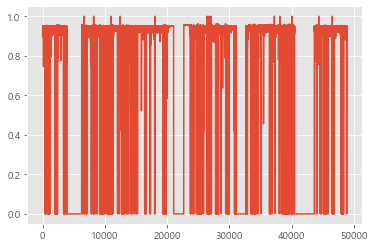

In [7]:
comp_1_one['역률평균'].plot()

In [8]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [10]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-10-22 00:00:22,70.500000,28.125,387.250000,223.500000,44696.0,2.702882e+05,0.948331,59.872740,4.817708,14954.0
2020-10-22 00:01:22,31.822916,28.125,387.416656,223.500000,19313.0,2.708402e+05,0.895390,59.863403,4.817708,9604.5
2020-10-22 00:02:22,70.927086,28.125,387.083344,223.333328,44907.0,2.714893e+05,0.948258,59.910122,4.785156,15036.0
2020-10-22 00:03:22,72.843750,27.500,387.500000,223.583328,46233.0,2.722598e+05,0.948171,59.872740,4.817708,15494.0
2020-10-22 00:04:22,47.104168,28.750,387.666656,223.750000,30076.0,2.729348e+05,0.937192,59.891440,4.817708,11194.0
...,...,...,...,...,...,...,...,...,...,...
2020-11-26 23:55:35,69.156250,20.625,390.666656,225.416672,44062.0,1.882519e+07,0.948614,59.872740,2.864583,14698.0
2020-11-26 23:56:35,37.562500,20.000,391.666656,225.916672,23548.0,1.882581e+07,0.918352,59.891422,2.897136,10148.0
2020-11-26 23:57:35,41.541668,20.625,392.500000,226.583328,26338.0,1.882643e+07,0.927980,59.807450,2.897136,10576.0


In [11]:
X = comp_1_one
X_train = comp_1_one[:43135]
X_test = comp_1_one[43135:]
X_train = X_train[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]
X_test = X_test[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]

In [12]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [13]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [14]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [15]:
X_train_scaling = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]

In [16]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [17]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [18]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '선간전압평균', '누적전력량', '주파수', '전압고조파평균']]

In [19]:
X_train_scaling[:43129]

,전류평균,온도,선간전압평균,누적전력량,주파수,전압고조파평균,역률평균
TIMESTAMP,,,,,,,
2020-10-22 00:06:22,-0.940927,-0.311229,0.052708,0.000859,1.570061,0.225185,-0.040315
2020-10-22 00:07:22,1.345996,0.000000,0.070280,0.000869,0.314321,0.193016,0.121986
2020-10-22 00:08:22,-1.287702,0.000000,0.228397,0.000863,-0.942157,0.386030,-0.102395
2020-10-22 00:09:22,-0.048205,0.000000,-0.052708,0.000858,0.000000,0.386030,-0.000905
2020-10-22 00:10:22,0.051941,-0.155614,-0.017565,0.000876,0.000000,0.289523,0.002622
...,...,...,...,...,...,...,...
2020-11-22 23:55:35,0.000000,-0.155614,-0.017572,0.000000,0.313145,-0.225185,0.000000
2020-11-22 23:56:35,0.000000,0.000000,-0.017572,0.000000,-0.939133,-0.064338,0.000000
2020-11-22 23:57:35,0.000000,0.000000,0.122988,0.000000,0.313515,-0.064338,0.000000


In [20]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,역률평균
2,Original Data,"(43129, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(34503, 6)"


In [21]:
best5models = compare_models(sort = 'RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0252,0.0249,0.1570,0.6908,0.0739,2.9663,0.7510
et,Extra Trees Regressor,0.0260,0.0256,0.1592,0.6803,0.0786,4.1174,1.3100
rf,Random Forest Regressor,0.0256,0.0262,0.1612,0.6717,0.0788,3.9079,2.5060
knn,K Neighbors Regressor,0.0321,0.0393,0.1968,0.5164,0.0893,3.7914,0.0440
lightgbm,Light Gradient Boosting Machine,0.0355,0.0414,0.2024,0.4859,0.0866,5.2772,0.1410
dt,Decision Tree Regressor,0.0281,0.0426,0.2061,0.4627,0.0966,6.0786,0.0620
ada,AdaBoost Regressor,0.0774,0.0538,0.2302,0.3254,0.1318,15.3610,0.1300
lr,Linear Regression,0.0814,0.0642,0.2526,0.2052,0.1266,23.6918,0.4770
ridge,Ridge Regression,0.0815,0.0642,0.2526,0.2052,0.1266,23.6084,0.0090
br,Bayesian Ridge,0.0814,0.0642,0.2526,0.2052,0.1266,23.6660,0.0100


In [22]:
best5models

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_

In [23]:
gbr = create_model('gbr', fold = 5, cross_validation = True)
et = create_model('et', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
knn = create_model('knn', fold = 5, cross_validation = True)
lh = create_model('lightgbm', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0337,0.0408,0.2019,0.4225,0.0861,6.8868
1,0.0365,0.0406,0.2015,0.5253,0.0899,6.4790
2,0.0355,0.0377,0.1941,0.5928,0.0865,4.6776
3,0.0389,0.0495,0.2225,0.4479,0.0907,5.6681
4,0.0341,0.0397,0.1992,0.4101,0.0828,4.3873
Mean,0.0358,0.0416,0.2038,0.4797,0.0872,5.6198
SD,0.0019,0.0041,0.0098,0.0693,0.0029,0.9749


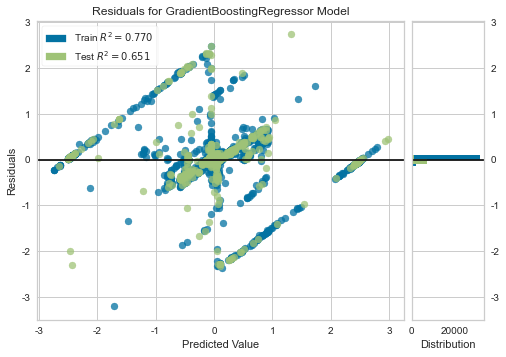

In [24]:
plot_model(gbr)

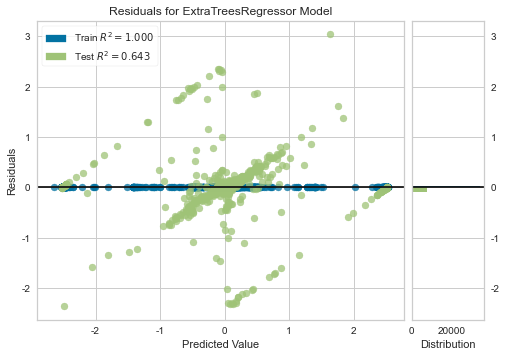

In [25]:
plot_model(et)

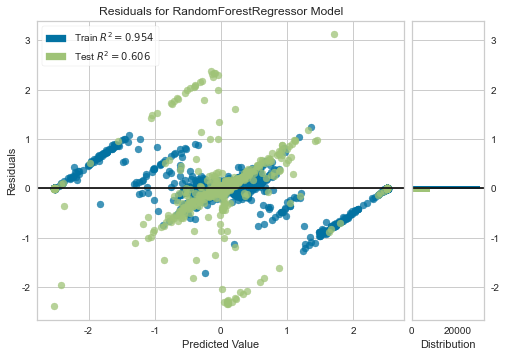

In [26]:
plot_model(rf)

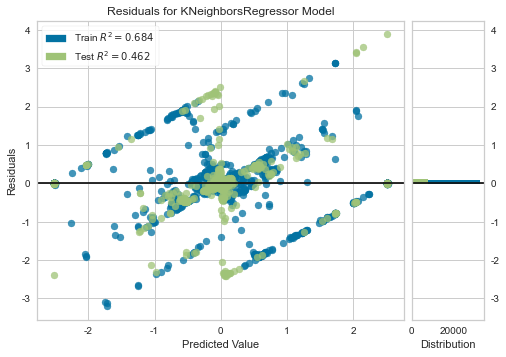

In [28]:
plot_model(knn)

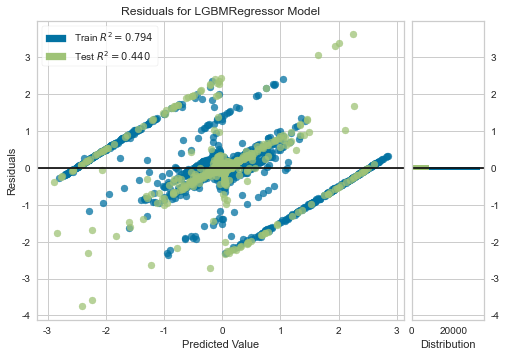

In [29]:
plot_model(lh)

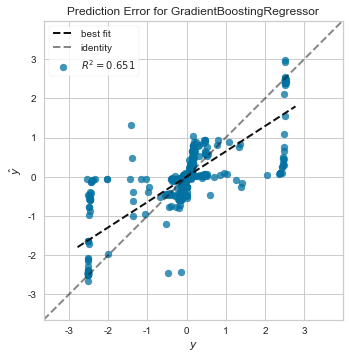

In [30]:
plot_model(gbr, plot='error')

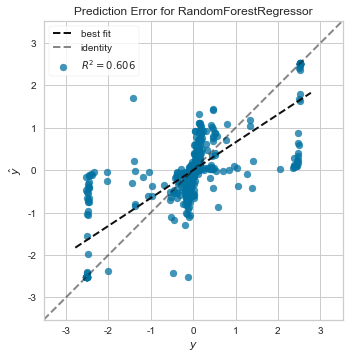

In [31]:
plot_model(rf, plot='error')

In [32]:
final_model = finalize_model(gbr)
pred = predict_model(final_model, data = X_test)

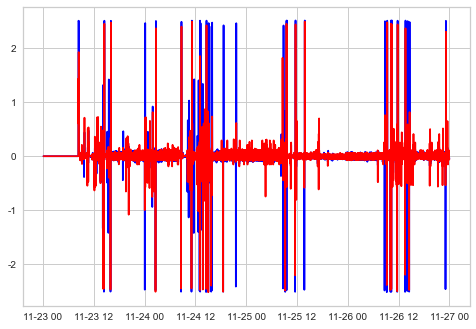

In [33]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [34]:
final_model = finalize_model(rf)
pred = predict_model(final_model, data = X_test)

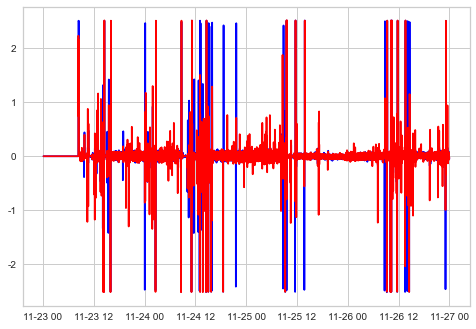

In [35]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [36]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [gbr,rf,et], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0278,0.0313,0.1769,0.5933,0.0834,4.1330
1,0.0238,0.0239,0.1545,0.6275,0.0746,4.5379
2,0.0217,0.0165,0.1285,0.7583,0.0672,3.2558
3,0.0265,0.0282,0.1681,0.7250,0.0847,4.1363
4,0.0231,0.0210,0.1450,0.7663,0.0723,2.1458
5,0.0265,0.0272,0.1649,0.7138,0.0806,3.3031
6,0.0250,0.0239,0.1545,0.7334,0.0731,4.2143
7,0.0266,0.0288,0.1696,0.6793,0.0728,2.8273
8,0.0222,0.0177,0.1331,0.6861,0.0672,3.2773
9,0.0253,0.0264,0.1624,0.6625,0.0778,2.8249


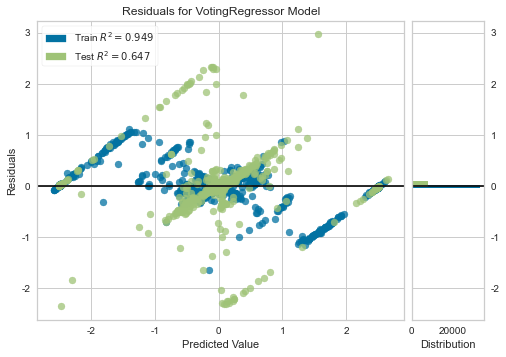

In [37]:
plot_model(blender_specific)

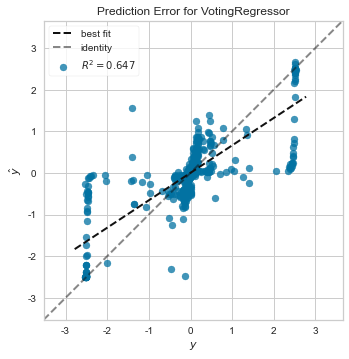

In [38]:
plot_model(blender_specific, plot='error')

In [39]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

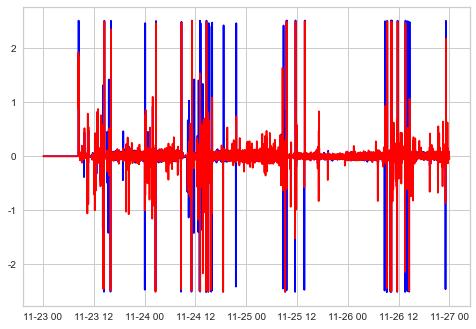

In [40]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')